# Other visualizations for the presentation

In [1]:
# BASIC IMPORTS BEFORE WE BEGIN
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import csv
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
import numpy as np
import random
import scipy.stats as ss

In [2]:
authordata = pd.read_csv('data/authordata.csv', index_col = 'author')
onlyboth = pd.read_csv('data/pairedwithprestige.csv', index_col = 'author')

In [3]:
crudedata = authordata
crudedata['binaryreview'] = 0
crudedata['centereddate'] = 0
crudedata['binarysales'] = 0
meandate = np.mean(crudedata.midcareer)
ctr = 0
for i in crudedata.index:
    crudedata.loc[i, 'centereddate'] = crudedata.loc[i, 'midcareer'] - meandate
    if crudedata.loc[i, 'reviews'] > 0:
        ctr += 1
        crudedata.loc[i, 'binaryreview'] = 1
    if crudedata.loc[i, 'salesevidence'] > 0:
        crudedata.loc[i, 'binarysales'] = 1
print(ctr)

from patsy import dmatrices
y, X = dmatrices('binarysales ~ binaryreview * centereddate + is_us', data=crudedata, return_type='dataframe')

crudelm = smf.Logit(y, X).fit()
crudelm.summary()

413
Optimization terminated successfully.
         Current function value: 0.530986
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            binarysales   No. Observations:                 1058
Model:                          Logit   Df Residuals:                     1053
Method:                           MLE   Df Model:                            4
Date:                Thu, 25 May 2017   Pseudo R-squ.:                 0.04956
Time:                        11:03:48   Log-Likelihood:                -561.78
converged:                       True   LL-Null:                       -591.07
                                        LLR p-value:                 5.756e-12
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -1.4459      0.131    -11.037      0.000      -1.703      -1.189
binaryreview                  0.3267      0.152      2.144      0.032       0.028       0.625
centereddate                  0.0243      0.004      6.575      0.000       0.017       0.032
binaryreview:centereddate    -0.0259      0.005     -4.726      0.000      -0.037      -0.015
is_us                         0.2699      0.149      1.809      0.070      -0.023       0.562
=============================================================================================
"""

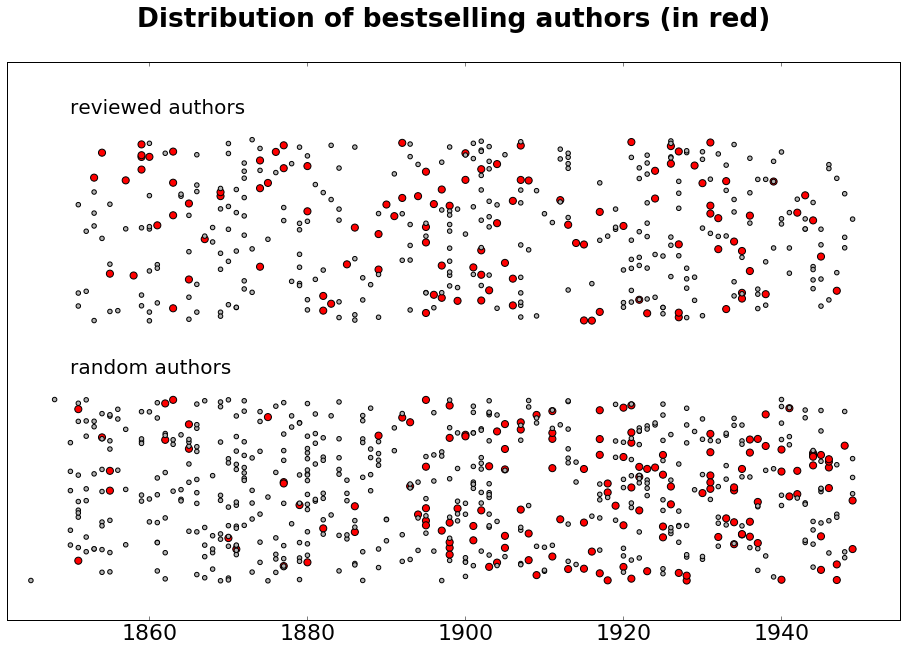

In [4]:
plotdata = crudedata.loc[ : , ['binaryreview', 'binarysales', 'midcareer']]
equiv = {0: '0.7', 1: 'r'}
plotdata['colors'] = plotdata.binarysales.map(equiv)
for i in plotdata.index:
    plotdata.loc[i, 'binaryreview'] = plotdata.loc[i, 'binaryreview'] + random.uniform(-0.35, 0.35)
import matplotlib

fig, ax = plt.subplots(figsize = (16,10))
# matplotlib.pylab.rcParams['figure.figsize'] = 16, 10
# plotdata.plot.scatter(x = 'midcareer', y = 'binaryreview', c = plotdata.colors, s = (plotdata.binarysales * 30) + 20)
plt.scatter(plotdata.midcareer, plotdata.binaryreview, c = plotdata.colors, s = (plotdata.binarysales * 30) + 20)
matplotlib.rcParams.update({'font.size': 22})
plt.xlim(1842, 1955)
plt.ylim(-0.5, 1.65)
ax.set_ylabel('')
ax.set_xlabel('')
ax.text(1850, 1.45, 'reviewed authors', fontsize=20)
ax.text(1850, 0.45, 'random authors', fontsize=20)
ax.set_title('Distribution of bestselling authors (in red)\n', fontweight = 'bold')
ax.set_yticklabels([])
ax.yaxis.set_ticks_position('none')
fig.savefig('images/authorscatter.png', bbox_inches='tight')
plt.show()

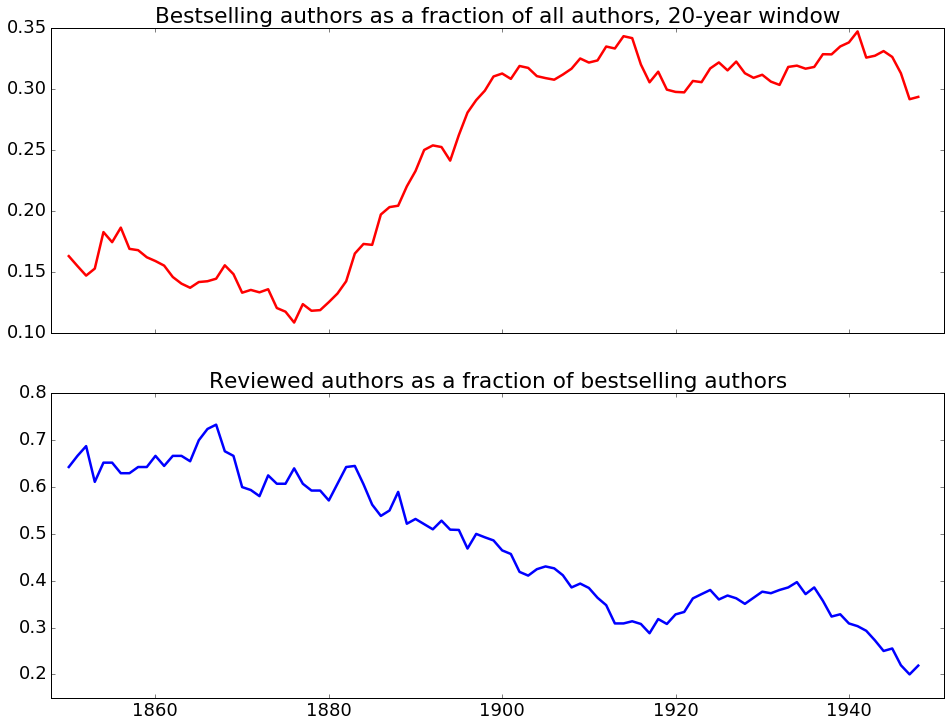

In [5]:
bestinall = []
revinallbest = []
for i in range(1850, 1949):
    floor = i - 10
    ceiling = i + 10
    timeslice = crudedata[(crudedata.midcareer >= floor) & (crudedata.midcareer < ceiling)]
    allauthors = len(timeslice)
    bestsellingauthors = np.sum(timeslice.binarysales)
    bestandreviewed = np.sum((timeslice.binarysales > 0.5) & (timeslice.binaryreview > 0))
    bestinall.append(bestsellingauthors / allauthors)
    revinallbest.append(bestandreviewed / bestsellingauthors)

x = list(range(1850,1949))
# Two subplots, sharing the X axis
fig, axarr = plt.subplots(2, sharex = True, figsize = (16,12))
matplotlib.rcParams.update({'font.size': 18})
axarr[0].plot(x, bestinall, c = 'red', linewidth = 2.5)
axarr[0].set_title('Bestselling authors as a fraction of all authors, 20-year window')
axarr[1].plot(x, revinallbest, linewidth = 2.5)
axarr[1].set_title('Reviewed authors as a fraction of bestselling authors')
axarr[1].set_ylim(0.15, 0.8)
axarr[1].set_xlim(1848, 1951)
fig.savefig('images/authorfractions.png', bbox_inches='tight')
plt.show()


In [6]:
onlyboth['binaryreview'] = crudedata.binaryreview
y, X = dmatrices('binaryreview ~ midcareer * posterior + is_us', data=onlyboth, return_type='dataframe')

newlm = smf.Logit(y, X).fit()
newlm.summary()

Optimization terminated successfully.
         Current function value: 0.646542
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           binaryreview   No. Observations:                  927
Model:                          Logit   Df Residuals:                      922
Method:                           MLE   Df Model:                            4
Date:                Thu, 25 May 2017   Pseudo R-squ.:                 0.05916
Time:                        11:03:58   Log-Likelihood:                -599.34
converged:                       True   LL-Null:                       -637.03
                                        LLR p-value:                 1.657e-15
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -29.6167      7.101     -4.171      0.000     -43.534     -15.699
midcareer               0.0153      0.004      4.087      0.000       0.008       0.023
posterior              44.3152     14.021      3.161      0.002      16.834      71.796
midcareer:posterior    -0.0227      0.007     -3.085      0.002      -0.037      -0.008
is_us                  -0.3143      0.141     -2.230      0.026      -0.591      -0.038
=======================================================================================
"""

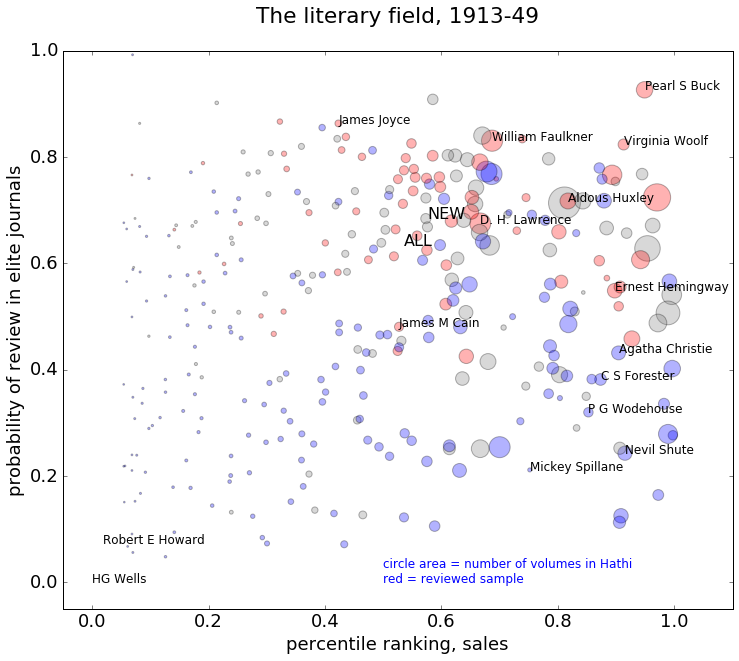

In [7]:
superelite = pd.read_csv('../fiction/superelite.csv')
superelite.drop_duplicates(subset = 'author', inplace = True)
superelite.set_index('author', inplace = True)

def get_a_period(aframe, floor, ceiling):
    ''' Extracts a chronological slice of our data.
    '''
    subset = aframe[(aframe.midcareer >= floor) & (aframe.midcareer < ceiling)]
    x = subset.percentile
    y = subset.prestige
    return x, y, subset

def get_an_author(anauthor, aframe):
    ''' Gets coordinates for an author in a given space.
    '''
    if anauthor not in aframe.index:
        return 0, 0
    else:
        x = aframe.loc[anauthor, 'percentile']
        y = aframe.loc[anauthor, 'prestige']
        return x, y

def plot_author(officialname, vizname, aperiod, ax):
    x, y = get_an_author(officialname, aperiod)
    ax.text(x, y, vizname, fontsize = 12)

def revtocolor(number):
    if number > 0.1:
        return 'red'
    else:
        return 'blue'

def elitemap(anid):
    global superelite, modernity2
    if modernity2.loc[anid, 'reviews'] < 0.5:
        return 'blue'
    elif anid not in superelite.index:
        return 'gray'
    elif superelite.loc[anid, 'tags'] == 'elite':
        return 'red'
    else:
        return 'gray'
        
# Let's plot modernism!

xvals, yvals, modernity2 = get_a_period(onlyboth, 1913,1950) 
modernauthors = pd.Series(modernity2.index.values)
samplecolor = pd.Series(data = modernauthors.apply(elitemap).values, index = modernity2.index.values)
modernity2 = modernity2.assign(samplecolor = samplecolor)
ax = modernity2.plot.scatter(x = 'percentile', y = 'prestige', s = modernity2.num_vols * 3, 
                             c = modernity2.samplecolor, alpha = 0.3, figsize = (12,10))

authors_to_plot = {'Cain, James M': 'James M Cain', 'Faulkner, William': 'William Faulkner',
                   'Wells, H. G': 'HG Wells', 'Hemingway, Ernest': 'Ernest Hemingway',
                  'Joyce, James': 'James Joyce', 'Forester, C. S. (Cecil Scott)': 'C S Forester',
                  'Spillane, Mickey': 'Mickey Spillane', 'Huxley, Aldous': 'Aldous Huxley',
                   'Howard, Robert E': 'Robert E Howard', 'Buck, Pearl S': 'Pearl S Buck',
                  'Shute, Nevil': 'Nevil Shute', 'Lawrence, D. H': 'D. H. Lawrence',
                   'Christie, Agatha': 'Agatha Christie',
                   'Wodehouse, P. G': 'P G Wodehouse', 'Woolf, Virginia': 'Virginia Woolf'}

for officialname, vizname in authors_to_plot.items():
    plot_author(officialname, vizname, modernity2, ax)

ax.set_xlabel('percentile ranking, sales')
ax.set_ylabel('probability of review in elite journals')
ax.set_title('The literary field, 1913-49\n')
ax.text(0.5, 0.0, 'circle area = number of volumes in Hathi\nred = reviewed sample', color = 'blue', fontsize = 12)

oldcenterx = np.mean(modernity2.percentile[modernity2.reviews > 0.5])
oldcentery = np.mean(modernity2.prestige[modernity2.reviews > 0.5])
ax.text(oldcenterx, oldcentery, 'ALL', fontsize = 16)
subset = modernity2.loc[superelite.index, :]
newcenterx = np.mean(subset.percentile[subset.reviews > 0.5])
newcentery = np.mean(subset.prestige[subset.reviews > 0.5])
ax.text(newcenterx, newcentery, 'NEW', fontsize = 16)

ax.set_ylim((-0.05,1))
ax.set_xlim((-0.05, 1.1))
plt.show()